<a href="https://colab.research.google.com/github/bambithenambi/MechOptimization/blob/main/shooterControl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, njit, vectorize
from timeit import default_timer as timer

#all units based in feet
height = 8.0
g=32.174
distances = np.arange(1.0, 55.0, .04)

@vectorize
def ang(distance):
    angle = math.atan(2*height/distance)
    return angle

@vectorize
def vel(distance, angle):
    a = -g*distance**2
    b = 2*(math.cos(angle)**2)
    c = height-distance*math.tan(angle) 
    velocity = math.sqrt(a/(b*c))
    return velocity

CPU times: user 82 µs, sys: 3 µs, total: 85 µs
Wall time: 89.9 µs
CPU times: user 92 µs, sys: 4 µs, total: 96 µs
Wall time: 98.2 µs
CPU times: user 20 µs, sys: 0 ns, total: 20 µs
Wall time: 22.4 µs


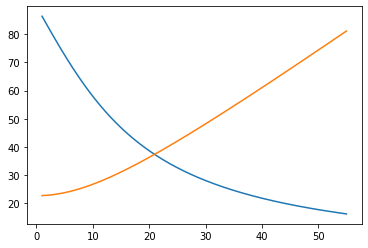

In [41]:
%time angle = ang(distances)
%time velocity = vel(distances, angle)
%time degrees = np.degrees(angle)
plt.plot(distances, degrees)
plt.plot(distances, velocity)
#angle, velocity = shoot(distances)